# Linear Regression Notebook
Notebook adapted from linear regression notebook from the Python Data Science Handbook  
Modified by: Gábor Major  
Last Modified date: 2024-10-16

In [1]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

### Simple Linear Regression

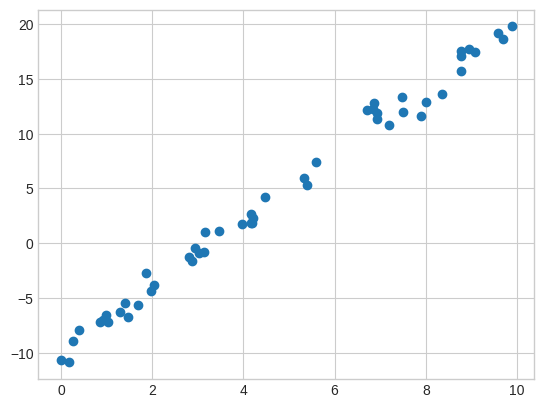

In [2]:
# Setup random data
rng = np.random.RandomState(1)
intercept = 10
gradient = 3
x = 10 * rng.rand(50)
y = gradient * x - intercept + rng.randn(50)
plt.scatter(x, y);

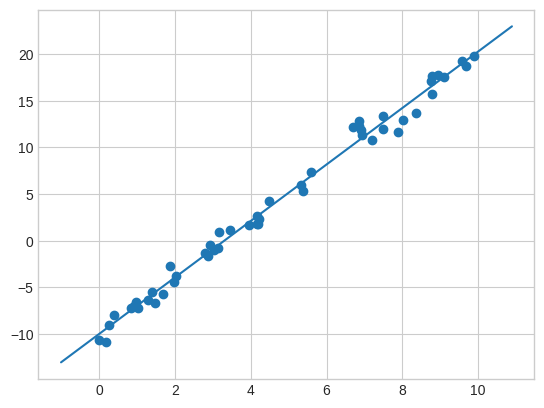

In [3]:
# Fit line to data
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

# Use min and max to scale line to data
xfit = np.linspace(min(x) - 1, max(x) + 1, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [4]:
# Print results
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     3.0272088103606944
Model intercept: -9.998577085553201


### Higher dimensionsional regression

In [5]:
rng = np.random.RandomState(1)
intercepts = [1.5, -2., 1.]
gradient = 0.5
X = 10 * rng.rand(100, 3)
y = gradient + np.dot(X, intercepts)

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


### Basis Function Regression

In [6]:
# Polynomial Basis Function
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [7]:
# Create 7-th degree polynomial model
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

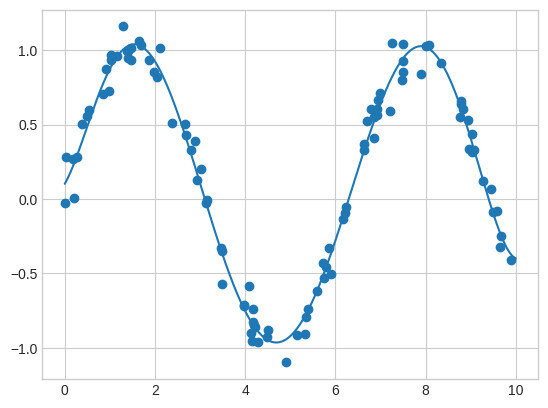

In [8]:
# Create and fit data
rng = np.random.RandomState(1)
intercept = 0.1
frequency = 1
x = 10 * rng.rand(100)
y = np.sin(x * frequency) + intercept * rng.randn(100)

poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);